# Supervised Linear Regression

Creating a model defining the outcome variable as a linear combination of a set of independent features. Steps involve:

 - Preprocess data
 - EDA
 - Split data into test and train set
 - Build and train model
 - Test/evaluate model


# Import and load data set
A dataset from a csv file needs to be loaded into the python environment and is stored in a dataframe which is analogous to a data table, in that the data is seen as rows and columns. Two packages DataFrame and read_csv are used for this.

We will investigate the Boston House Price dataset

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.


The attributes are defined as follows:
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 tract bounds river; 0 otherwise)
5. NOX nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 dollars
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0:63)^2 where Bk is the proportion of blocks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000 dollars

In [103]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Import additional packages necessary for loading data from csv source and manipulating it in python
from pandas.plotting import scatter_matrix
from pandas import DataFrame, read_csv

In [104]:
# import scikit module for linear regression
from sklearn.linear_model import LinearRegression
# import scikit module for spliting data into training and testing datasets
from sklearn.model_selection import train_test_split
# import scikit module for kfold cross validation for evaluation and cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [105]:
#Load data into a pandas dataframe
dirpath = "/Users/jacobdenny/Desktop/Babloo/Masters/Semester3/ADTA5340/DataFiles/"
df = pd.read_csv(dirpath+"housing_boston_w_hdrs.csv")

# Not assigning column headers, as this dataset has headers
#get familiarized with the data
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Preprocessing Data

We are trying to predict the median value of owner occupied houses in 1000 dollors(MEDV) using linear regression with all the features as predictors.  Also, from domain knowledge we know that the average value of a home, the pupil teacher ratio and average number of rooms per dwelling cannot be zero. If any row cell contain zero for these three columns that needs to be marked as mising. So preprocessing includes:
 - Extract the columns under consideration
 - Data cleaning
 - Check for invalid Values

In [106]:
#Data cleaning
#Replace 0 value with NaN for all variables except CHAS(0 is a valid value for CHAS) and
#ZN(ZN can be 0 when proportion of residential land zoned for lots over 25,000 sq.ft is zero)
df[['CRIM','INDUS','NOX','RM','AGE','DIS','RAD','TAX', 'PTRATIO','B','LSTAT', 'MEDV']] = df[['CRIM','INDUS','NOX','RM','AGE','DIS','RAD','TAX', 'PTRATIO','B','LSTAT', 'MEDV']].replace(0, np.NaN)

#Verify there are no missing values in the dataset
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


There are no missing values in the dataset. Now we are ready to move to Exploratory data analysis

## Exploratory Data Analysis

In this step we are getting to know our data. The number of columns and rows, what each column represent etc. The following are explored in this section:

 - Shape of data set
 - Type of each value in the dataset
 - View a snippet of the dataset
 - Descriptive statistics of each column
 - Univariate plots
 - Multivariate plots


In [107]:
#SHAPE
# Get the dimensions or Shape of the dataset
# i.e. number of records/rows x number of variables/columns
print(df.shape)

(452, 14)


We have 14 variables and 452 rows. Out of the 14 one is dependent variable Y(MEDV: Median value of owner-occupied homes in 1000 dollars)

In [108]:
#TYPE
# Get the data types of all variabLes/attributes of the data set
# The results show
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


All the features and the dependent variable(MEDV) are of type floating point except RAD,TAX and CHAS which is integer type. But CHAS should be bool.

In [109]:
df.astype({'CHAS': 'bool'}).dtypes

#View of a snippet of Dataset
# Get the first five records
print(df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [110]:
#Summary Statistics
# Get the summary statistics of the numeric variables/attributes of the dataset
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     1.420825   12.721239   10.304889    0.077434    0.540816    6.343538   
std      2.495894   24.326032    6.797103    0.267574    0.113816    0.666808   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.069875    0.000000    4.930000    0.000000    0.447000    5.926750   
50%      0.191030    0.000000    8.140000    0.000000    0.519000    6.229000   
75%      1.211460   20.000000   18.100000    0.000000    0.605000    6.635000   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    65.557965    4.043570    7.823009  377.442478   18.247124  369.826504   
std     28.127025    2.0904

The above table gives the summary statistics for each of the columns. This includes number  of records, mean, standard deviation, minimum 25 percentile 50 percentile 75 percentile and the maximum values of each column 


## Find the variables correlations
The “corr()” method evaluates the correlation between all the features, then it can be graphed with a color coding:
On this example, when there is no correlation between 2 variables (when correlation is 0 or near 0) the color is gray. The darkest red means there is a perfect positive correlation, while the darkest blue means there is a perfect negative correlation.

The same is shown as a table also.

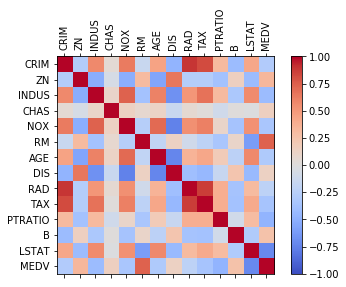

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.281239  0.573822  0.050066  0.636941 -0.142458  0.447664   
ZN      -0.281239  1.000000 -0.514273 -0.059697 -0.500729  0.306623 -0.555679   
INDUS    0.573822 -0.514273  1.000000  0.103016  0.738517 -0.364895  0.605982   
CHAS     0.050066 -0.059697  0.103016  1.000000  0.134064  0.076580  0.123141   
NOX      0.636941 -0.500729  0.738517  0.134064  1.000000 -0.264594  0.707148   
RM      -0.142458  0.306623 -0.364895  0.076580 -0.264594  1.000000 -0.187871   
AGE      0.447664 -0.555679  0.605982  0.123141  0.707148 -0.187871  1.000000   
DIS     -0.461967  0.656152 -0.669362 -0.140662 -0.745812  0.138774 -0.720334   
RAD      0.897988 -0.266606  0.513306  0.057337  0.542499 -0.095931  0.359326   
TAX      0.825668 -0.269446  0.673312  0.016894  0.615120 -0.214948  0.427095   
PTRATIO  0.319470 -0.364122  0.317336 -0.099623  0.103464 -0.334164  0.192956   
B       -0.413014  0.150380 

In [111]:
correlation = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
tick = np.arange(0,len(df.columns),1)
ax.set_xticks(tick)
plt.xticks(rotation=90)
ax.set_yticks(tick)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()
print(correlation)
corelationwithMedianValue=correlation[["MEDV"]]
print(corelationwithMedianValue.sort_values("MEDV"))

MEDV IS HIGHLY CORELATED TO RM AND LSTAT(INVERSELY). FAIRLY STRONG INVERSE CORELATION BETWEEN MEDV AND PTRATIO, MEDV AND INDUS IS ALSO OBSERVED.

Strong corelation between Age and nox, dis and nox, rad and crim , tax and crim, nox and indus, tax and rad can be a problem in our analysis leading to multicolinearity

### Histograms

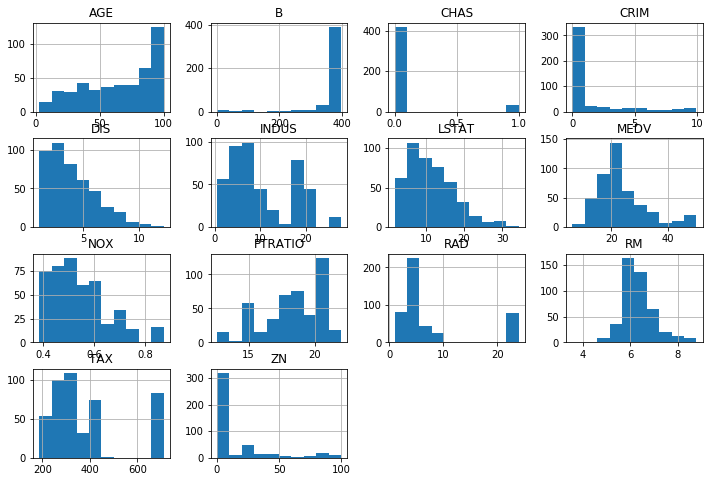

In [112]:
# Plot histrogram for each numeric
df.hist(figsize=(12, 8))
plt.show()

MEDV our dependent variable shows a distribution close to normal,PTRATIO and RM has a distribution that is almost normal but the rest are not.
### Density Plots

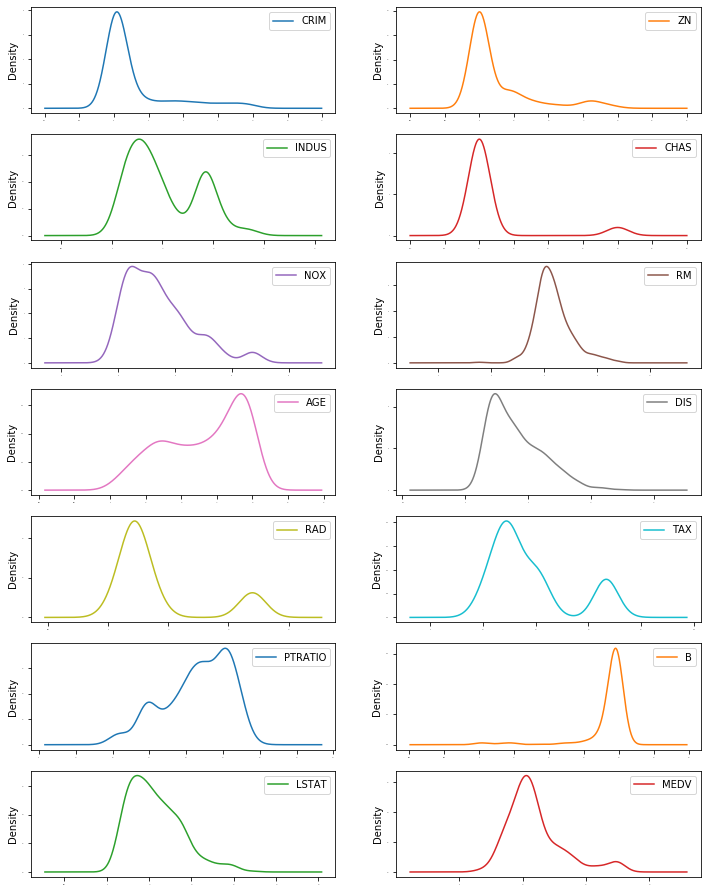

In [113]:
# Density plots
# IMPORTANT NOTES: 5 numeric variables -> at Least 5 plots -> Layout (7, 2): 7rows, each row with 2 plots
df.plot(kind='density', subplots=True, layout=(7, 2), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
plt.show()

Consistent with the histogram, density plots also gives an almost normal distribution for MEDV,PTRATIO and RM. but DIS is also fairly normal in density plot. But RAD and AGE are bimodal. Indus also shows bimodal distribution
### Box Plots

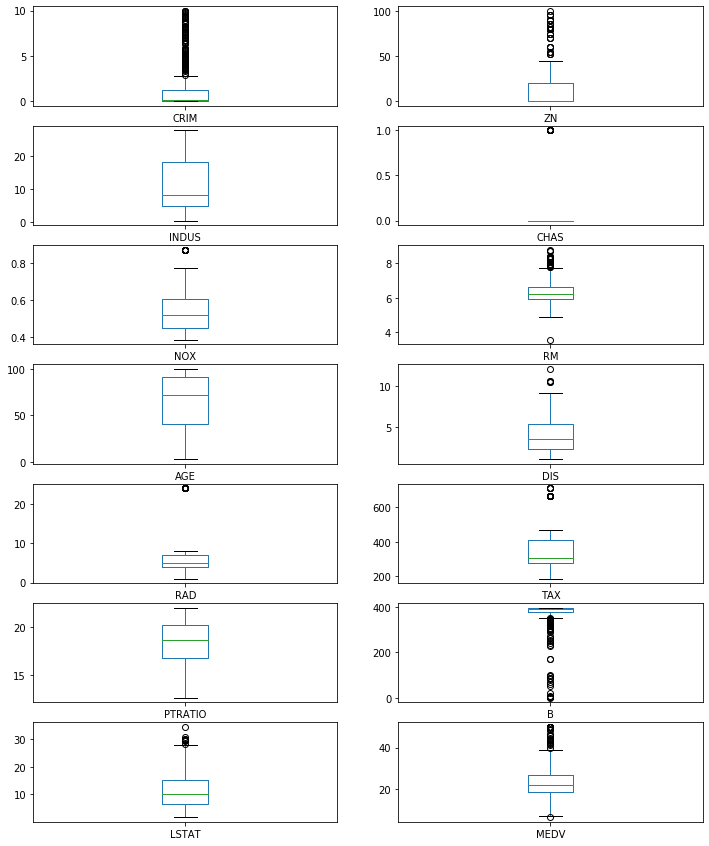

In [114]:
df.plot(kind='box', subplots=True, layout=(7,2), sharex=False, figsize=(12,15))
plt.show()

 - RAD and NOX has a single outlier each
 - MEDV, RM and DIS has outliers at both ends
 - LSTAT, CRIM and ZN has outliers in the upper tail
 - TAX has outliers in the lower tail
 - Min value of RM is 1 and max at 9
 - Min value od AGE is 4 and max just below 100
 - Min value of DIS is 1 and max just below 12.5
 - Min value of RAD is 1 and max just below 10 with an outlier at 25
 - Min value of PTRATIO is 5 and max just below 22
 - Min value of MEDV is 41 and max just above 50
 
 ## Multivariate Analysis : Scatter Matrix

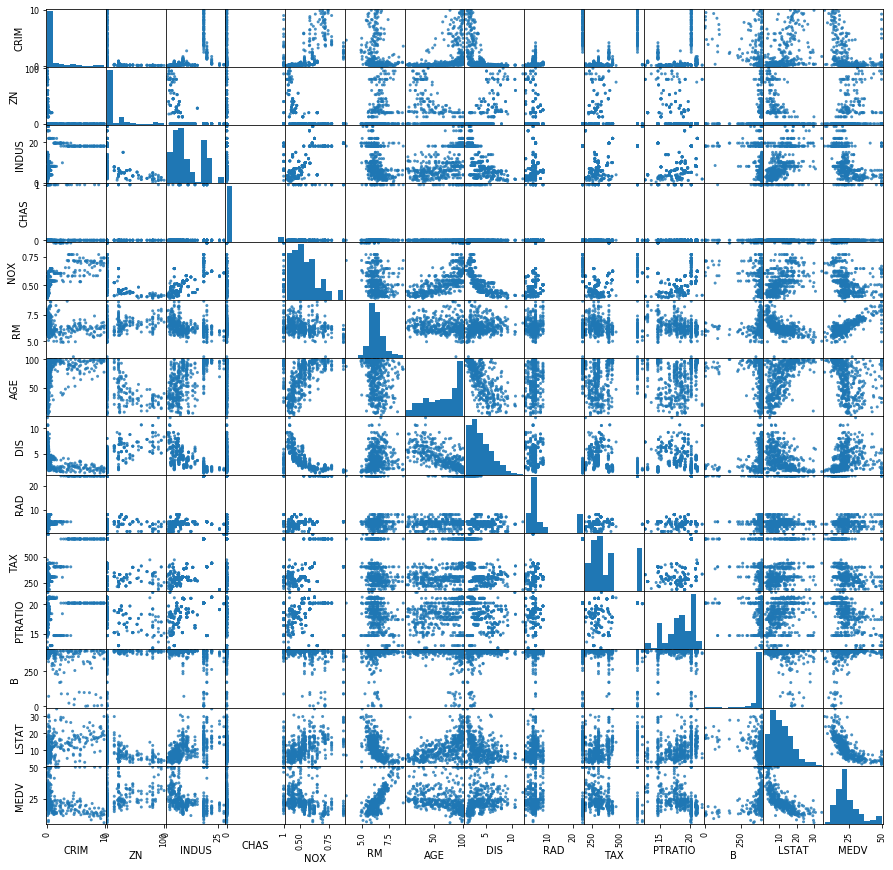

In [127]:
# scatter plot matrix

scatter_matrix(df, alpha=0.8, figsize=(15, 15))
plt.show()

 
It is difficult to draw conclusion from above figure let us plot our dependent varaible against each independent variable as 3 different plots

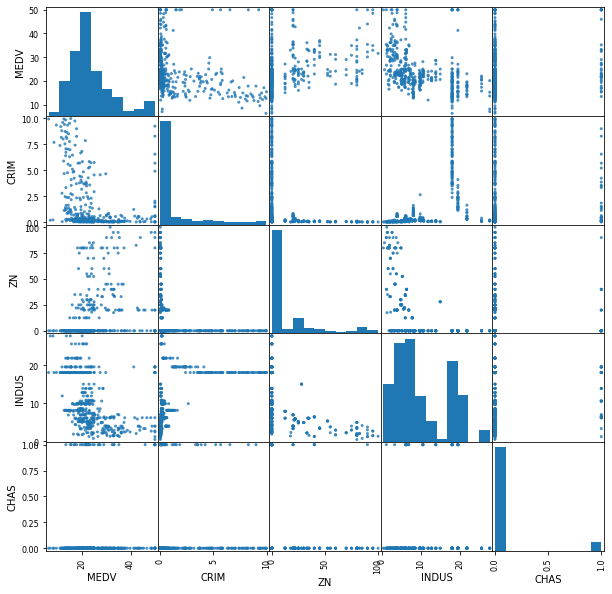

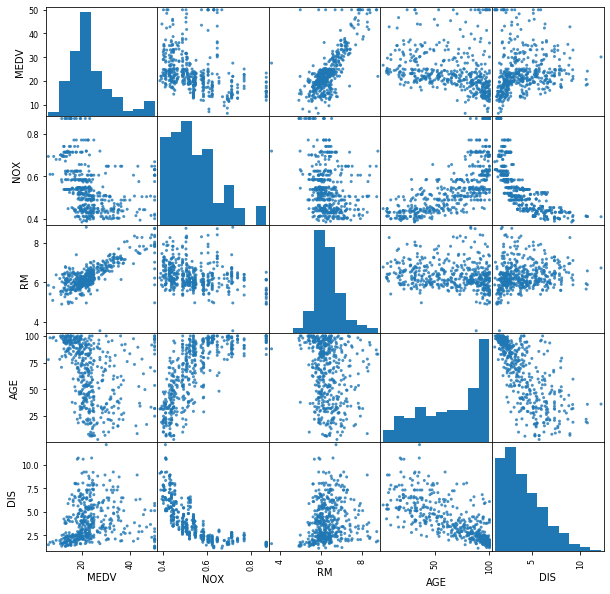

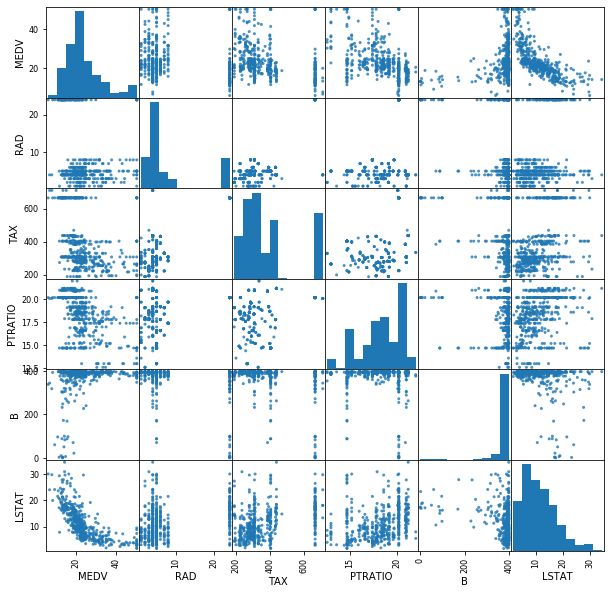

In [116]:
# scatter plot matrix
params  =['MEDV','CRIM','ZN','INDUS','CHAS']
params2 =['MEDV','NOX','RM','AGE','DIS']
params3 =['MEDV','RAD','TAX','PTRATIO','B','LSTAT']

scatter_matrix(df[params], alpha=0.8, figsize=(10, 10))
plt.show()
scatter_matrix(df[params2], alpha=0.8, figsize=(10, 10))
plt.show()
scatter_matrix(df[params3], alpha=0.8, figsize=(10, 10))
plt.show()

 - There is an evident linear relation between MEDV and RM
 - There is an evident linear inverse relation between MEDV and LSTAT
 - There is an SLIGHT linear inverse relation between MEDV and PTRATIO
 - There is an SLIGHT linear inverse relation between MEDV and TAX
 - There is an SLIGHT linear relation between MEDV and B
 - MEDV and AGE is showing an inverse linear relation
 - DIS and MEDV on the other hand has a direct linear relation

# Separate Dataset into Input & Output NumPy Array

In [117]:
# Store dataframe values into a numpy array
array = df.values
# separate array into input and output components by slicing
# For X (input)[:, 13] --> all the rows, columns from 0 - 4 (5 - 1)
X = array[:,0:13]
# For Y (output)[:, 13] --> all the rows, column index 5 (Last column)
Y = array[:,13]

 - InDependent variables are 'CRIM','ZN','INDUS','CHAS',NOX','RM','AGE','DIS','RAD','TAX', 'PTRATIO','B','LSTAT', 'MEDV' columns 0 to 12
 - Dependent variable is 'MEDV' column AT INDEX 13
 
# Split Input/Output Arrays into Training/Testing Datasets

In [118]:
# Split the dataset --> training sub-dataset: 67%; test sub-dataset:
test_size = 0.33
# Selection of records to include in which sub-dataset must be done randomly
# use this seed for randomization
seed = 7
# Split the dataset (both input & outout) into training/testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

 - 33% of the data is test data
 - 67% of the data is train data
 - Split is based on random sampling 
 
 # Build and Train the Model

In [119]:
# Build the model
model = LinearRegression()
# Train the model using the training sub-dataset
model.fit(X_train, Y_train)
# Print out the coefficients and the intercept
# print intercept and coefficients

print ("Intercept",model.intercept_)
#print (model.coef_)

# If we want to print out the list of the coefficients with their correspondent variable name
# pair the feature names with the coefficients
names_2 = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX', 'PTRATIO','B','LSTAT']
coeffs_zip = zip(names_2, model.coef_)
# Convert iterator into set
coeffs = set(coeffs_zip)
#print (coeffs)
for coef in coeffs:
 print(coef, "\n")

Intercept 15.201425563606392
('TAX', -0.014685983810144403) 

('B', 0.009115025292886728) 

('ZN', 0.029534326900696142) 

('CRIM', -0.8379508399339026) 

('DIS', -1.0932024608697326) 

('AGE', -0.018188309648346355) 

('INDUS', 0.008237611910701716) 

('CHAS', 0.5987122645468941) 

('RM', 5.84928681170049) 

('NOX', -6.403329499288758) 

('PTRATIO', -0.8664479587793855) 

('LSTAT', -0.38263910772938087) 

('RAD', 0.43482828981343175) 



The model build by the algorithm is

    MEDV = 15.201425563606392 +
        ('TAX', -0.014685983810144403) +
        ('B', 0.009115025292886728) +
        ('ZN', 0.029534326900696142)+ 
        ('CRIM', -0.8379508399339026) +
        ('DIS', -1.0932024608697326) +
        ('AGE', -0.018188309648346355) +
        ('INDUS', 0.008237611910701716) +
        ('CHAS', 0.5987122645468941) +
        ('RM', 5.84928681170049) +
        ('NOX', -6.403329499288758) +
        ('PTRATIO', -0.8664479587793855) +
        ('LSTAT', -0.38263910772938087) +
        ('RAD', 0.43482828981343175)


 - As per the model for unit increase in TAX, with all other features held constant MEDV increases 0.014685983810144403
 - As per the model for unit increase in B, with all other features held constant MEDV INCREASE 0.009115025292886728
 - As per the model for unit increase in ZN, with all other features held constant MEDV INCREASE 0.029534326900696142
 - As per the model for unit increase in CRIM, with all other features held constant MEDV decreases 0.8379508399339026
 - As per the model for unit increase in DIS, with all other features held constant MEDV decreases 1.0932024608697326
 - As per the model for unit increase in AGE, with all other features held constant MEDV increases 0.018188309648346355
 - As per the model for unit increase in INDUS, with all other features held constant MEDV INCREASE 0.008237611910701716
 - As per the model for unit increase in CHAS, with all other features held constant MEDV INCREASE 0.5987122645468941
 - As per the model for unit increase in RM, with all other features held constant MEDV INCREASE 5.84928681170049
 - As per the model for unit increase in NOX, with all other features held constant MEDV decreases 6.403329499288758
 - As per the model for unit increase in PTRATIO, with all other features held constant MEDV decreases 0.8664479587793855
 - As per the model for unit increase in LSTAT, with all other features held constant MEDV decreases 0.38263910772938087
 - As per the model for unit increase in RAD, with all other features held constant MEDV INCREASE 0.43482828981343175

 
# Calculate R-Squared

In [120]:
R_squared = model.score(X_test, Y_test)
print("R_squared:",R_squared)


R_squared: 0.6155876832723213


The model has successfully explained 61. % of variance in MEDV using ALL THE variables 


# Prediction
We have trained the model.
Let's use the trained model to predict the "Median value of owner-occupied homes in 1000 dollars" (MEDV)_

Predict value of house with the following parameters in the new sururb of Boston:
 - CRIM: 1.4208250442477868 
 - ZN: 12.721238938053098 
 - INDUS: 10.304889380530954 
 - CHAS: 0.07743362831858407 
 - NOX: 0.540815707964603 
 - RM: 6.343537610619477 
 - AGE: 65.55796460176992 
 - DIS: 4.0435703539822985 
 - RAD: 7.823008849557522 
 - TAX: 377.4424778761062 
 - PTRATIO: 18.247123893805263 
 - B: 369.8265044247781 
 - LSTAT: 11.44188053097345

Predict value of another house with the following parameters:
 - CRIM: 0.19102999999999998 
 - ZN: 0.0 
 - INDUS: 8.14 
 - CHAS: 0.0 
 - NOX: 0.519 
 - RM: 6.229 
 - AGE: 71.80000000000001 
 - DIS: 3.5504 
 - RAD: 5.0 
 - TAX: 307.0 
 - PTRATIO: 18.6 
 - B: 392.08000000000004 
 - LSTAT: 10.25


In [139]:
description=df.describe()
array1 = description.values
print("Predict value of house with the following parameters in the new sururb of Boston:\nCRIM:",array1[1,0],'\nZN:',array1[1,1],'\nINDUS:',array1[1,2],'\nCHAS:',array1[1,3],'\nNOX:',array1[1,4],'\nRM:',array1[1,5],'\nAGE:',array1[1,6],'\nDIS:',array1[1,7],'\nRAD:',array1[1,8],'\nTAX:',array1[1,9],'\nPTRATIO:',array1[1,10],'\nB:',array1[1,11],'\nLSTAT:',array1[1,12])
predictionUsingMeanvalues=[array1[1,0],array1[1,1],array1[1,2],array1[1,3],array1[1,4],array1[1,5],array1[1,6],array1[1,7],array1[1,8],array1[1,9],array1[1,10],array1[1,11],array1[1,12]]
Predicted_Value_From_MeanOfEveryPredictor = model.predict([predictionUsingMeanvalues])

print("Predicted Median value of owner-occupied homes in 1000 dollars for the above house is :",Predicted_Value_From_MeanOfEveryPredictor[0],"Thousand" )

print("\nPredict value of another house with the following parameters:\nCRIM:",array1[5,0],'\nZN:',array1[5,1],'\nINDUS:',array1[5,2],'\nCHAS:',array1[5,3],'\nNOX:',array1[5,4],'\nRM:',array1[5,5],'\nAGE:',array1[5,6],'\nDIS:',array1[5,7],'\nRAD:',array1[5,8],'\nTAX:',array1[5,9],'\nPTRATIO:',array1[5,10],'\nB:',array1[5,11],'\nLSTAT:',array1[5,12])

predictionUsingMedianvalues=[array1[5,0],array1[5,1],array1[5,2],array1[5,3],array1[5,4],array1[5,5],array1[5,6],array1[5,7],array1[5,8],array1[5,9],array1[5,10],array1[5,11],array1[5,12]]
Predicted_Value_From_MedianOfEveryPredictor = model.predict([predictionUsingMedianvalues])

print("Predicted Median value of owner-occupied homes in 1000 dollars for the above house is :",Predicted_Value_From_MedianOfEveryPredictor[0],"Thousand" )


Predict value of house with the following parameters in the new sururb of Boston:
CRIM: 1.4208250442477868 
ZN: 12.721238938053098 
INDUS: 10.304889380530954 
CHAS: 0.07743362831858407 
NOX: 0.540815707964603 
RM: 6.343537610619477 
AGE: 65.55796460176992 
DIS: 4.0435703539822985 
RAD: 7.823008849557522 
TAX: 377.4424778761062 
PTRATIO: 18.247123893805263 
B: 369.8265044247781 
LSTAT: 11.44188053097345
Predicted Median value of owner-occupied homes in 1000 dollars for the above house is : 23.588360656499706 Thousand

Predict value of another house with the following parameters:
CRIM: 0.19102999999999998 
ZN: 0.0 
INDUS: 8.14 
CHAS: 0.0 
NOX: 0.519 
RM: 6.229 
AGE: 71.80000000000001 
DIS: 3.5504 
RAD: 5.0 
TAX: 307.0 
PTRATIO: 18.6 
B: 392.08000000000004 
LSTAT: 10.25
Predicted Median value of owner-occupied homes in 1000 dollars for the above house is : 24.234439514400382 Thousand


# Evaluate/Validate Algorithm/Model  Using K-Fold Cross-Validation

In [135]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold = KFold(n_splits=num_folds, random_state=seed)
# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
resultsRsq = cross_val_score(model, X, Y, cv=kfold, scoring='r2')

# Print out the evaluation results
# Result: the average of all the results obtained from the k-foLd cross-validation
print(results.mean())
print(resultsRsq.mean())

-30.12046153519849
0.5365761842909438


# Evaluation results of the model

Used K-Fold to determine if the model is acceptable
We pass the whole set because the system will divide for us.

 -  mean of square errors this value would traditionally be positive value, but scikit reports as neg and is -30.12 and the square root of the value is between 5 and 6 which gives us an idea about how far our estimation of Y is from real Y


With the test train split we calculated an R square of .61 but that is applicable to only that sample. Where as in K-fold validation with number of folds set to 10, we have 10 different accuracies which averages to 53. K-fold validation describes the population better than a predicting on single sample from population and that deceases the accuracy to 0.53
Even though k fold decrased the accuracy, it is the best estimate of population.
